# Uncovering Incels

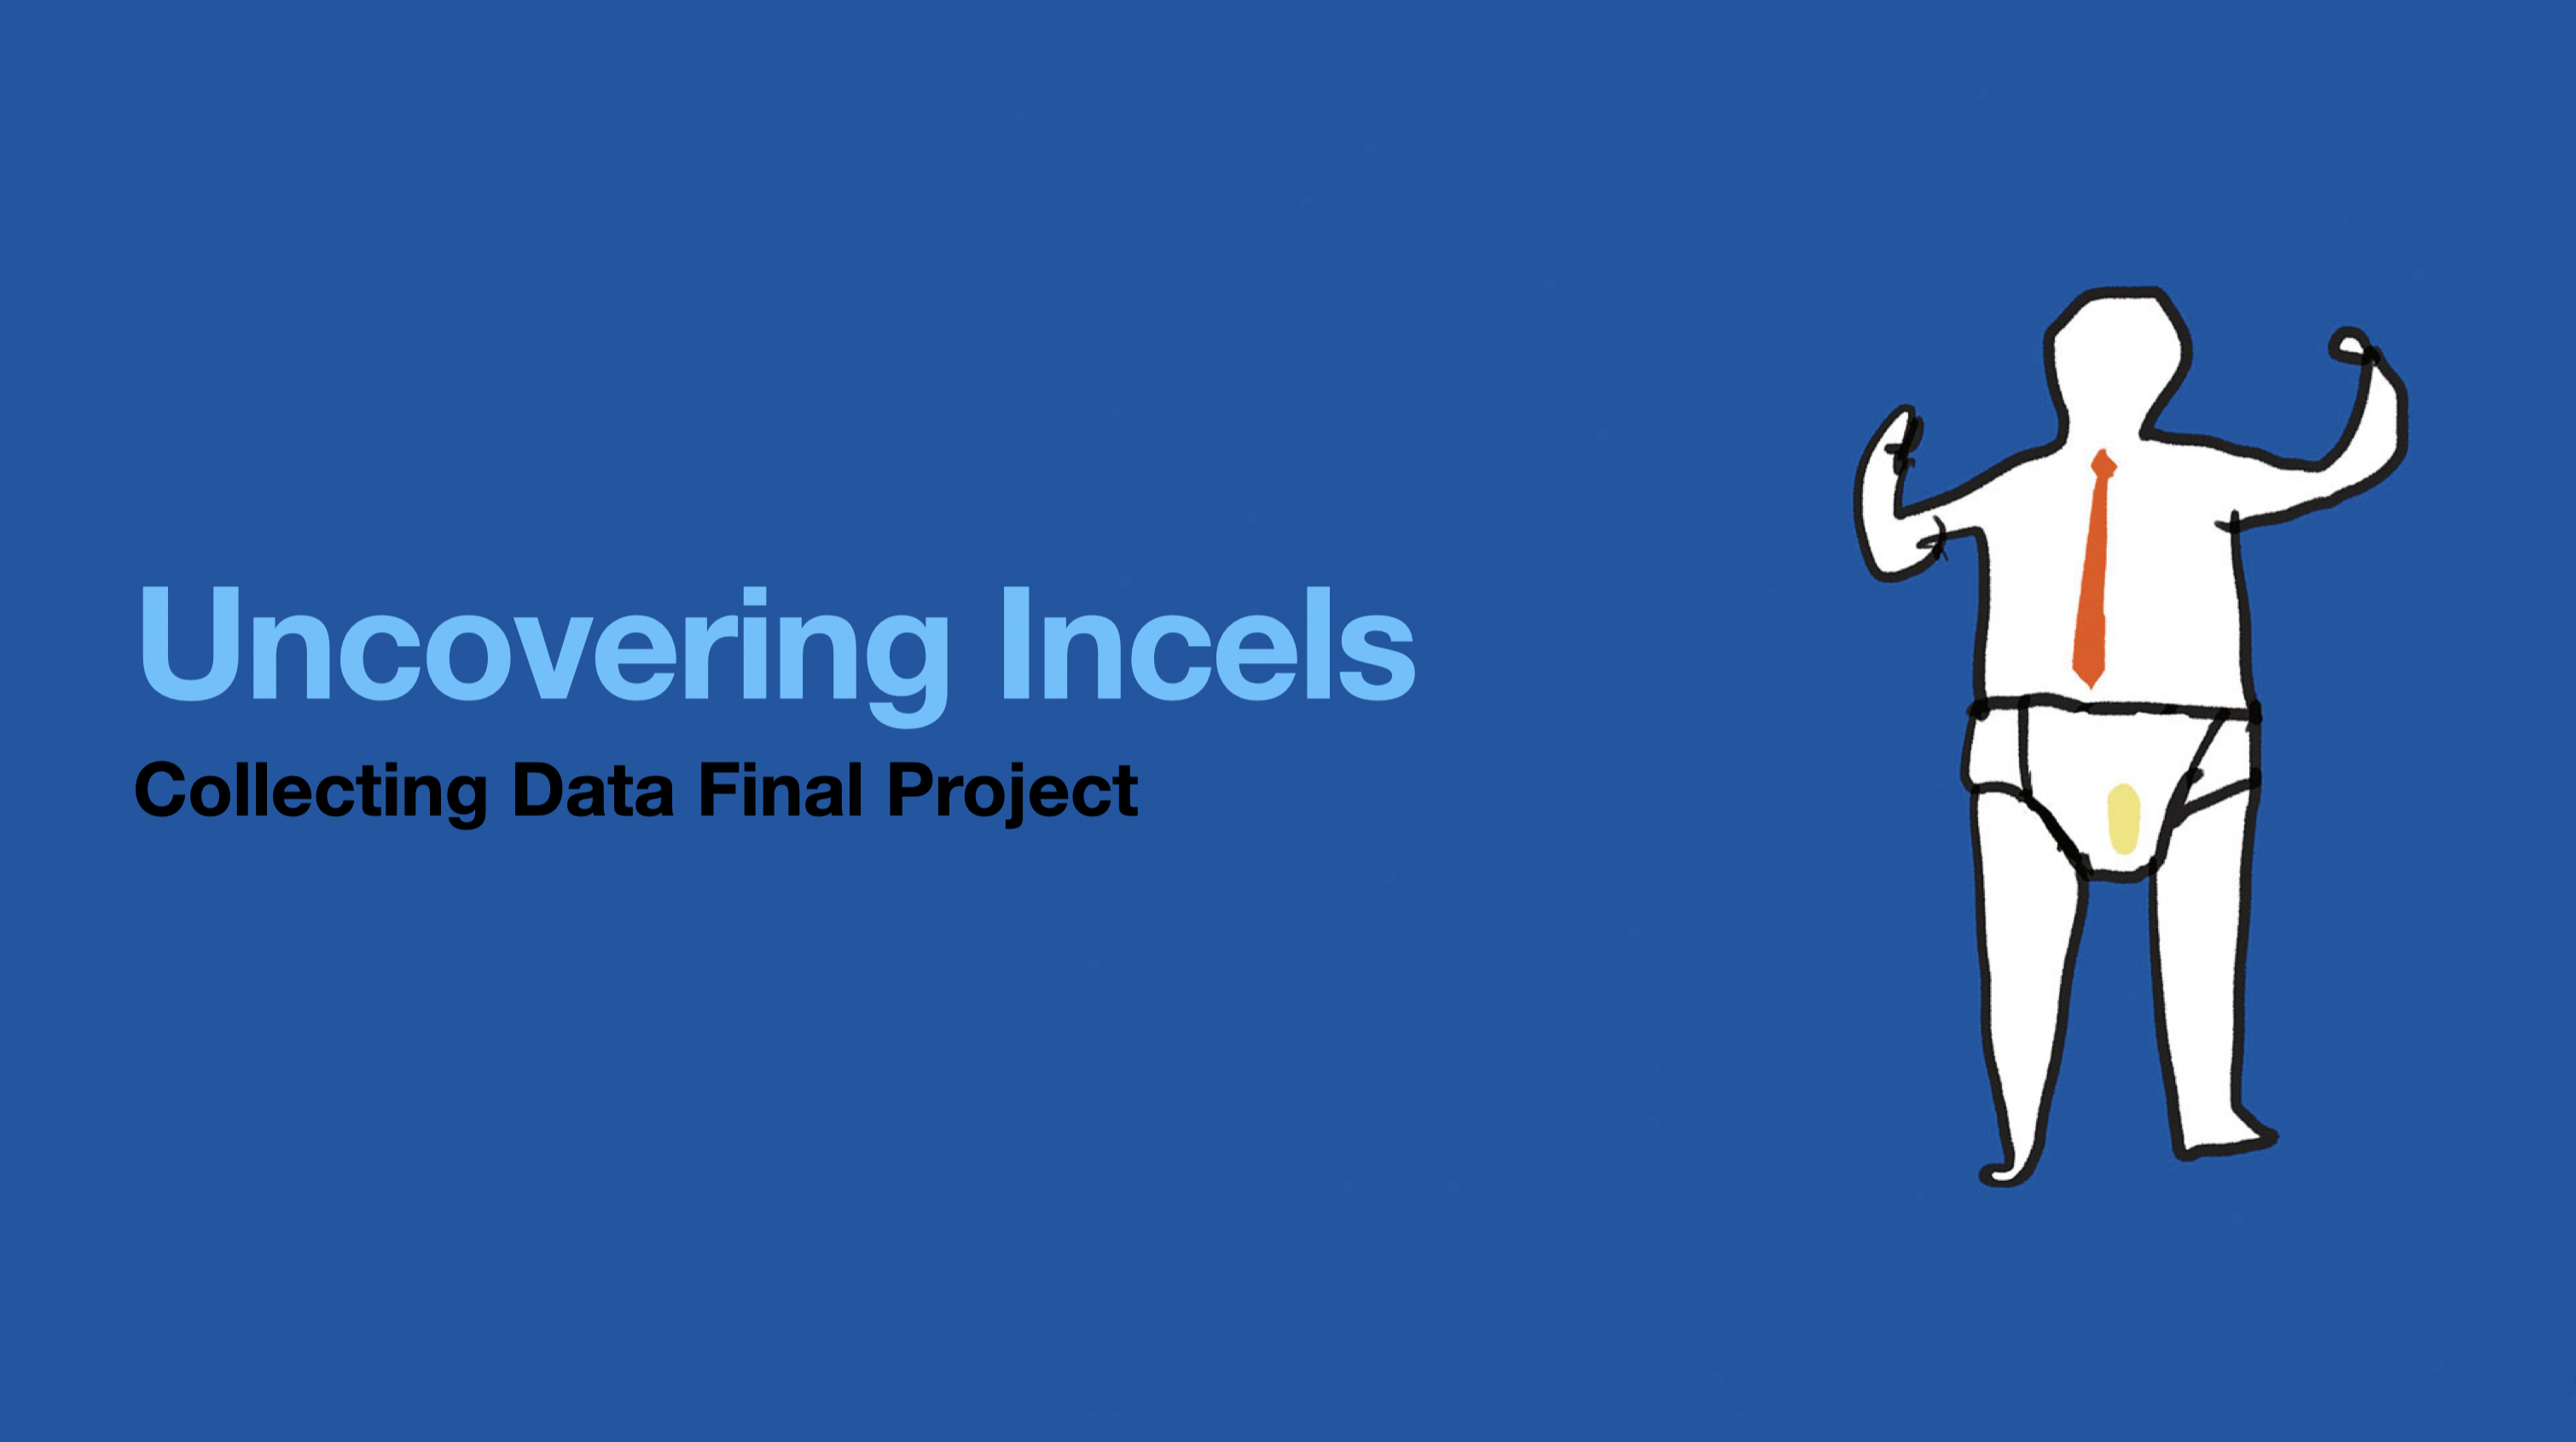

## 1. Introduction and Backstory

- **Definition**: *'incel'* is an acronym designating a person (usually a man) who regards himself or herself as being involuntary celibate and typically expresses extreme resentment and hostility toward those who are sexually active.

**BACKSTORY**

The incel community was born online and it is growing in the digital sphere in form of forums, platforms, subreddits etc. The first website of this kind, believe it or not, was created by an undergraduated student named Alana who created the website "Involuntary Celibacy Project" intended to be a safe space for people to share their frustrations over sexual inactivity with others(Taylor, 2018). From that point things escaleted quickly. The online ecosystem has made it possible for people with similar experiences to connect and completely shaped the evolution of this subculture–as it allowed incels to communicate their frustration and anger associated with their "perceived genetic inferiority"(Incels, 2021) easily.

This has resulted in the creation of a common incel ideology, which is constantly gaining on popularity and is known for its potential to lead to serious violence, putting public health and safety at risk (Incels, 2021). Incels are usually characterized by deep resentment, hatred, misogyny, self-pity, racism and a sense of entitlement to sex, which can escalate to different forms of rape culture. Women, sexual active people, feminists-and therefore society as a whole-are posed here as offenders, as they are the cause for the situation in which incels find themselves.

**INTRODUCTION**

Therefore, the goal of the project is to study user activity on the Incels.is forum, which is considered one of the largest concentrations of incels related content available online. Specifically, our focus is on the “Must-Read Content” section of the forum. This section, deemed noteworthy by the community itself, likely contains key themes and ideas that are representative of the incel subculture. It provides a rich source of data for our research, allowing us to delve deeper into the core beliefs, attitudes, and discussions prevalent within the group. Because it is the "Must-Read Content", it also shows how incels themselves want to represent the community. While the forum also includes other sections like “Inceldom Discussion” and “The Lounge”, we believe that the concentrated and substantial discussions in the “Must-Read Content” section offer more valuable insights for our research purpose.

Such examinations are important as: “Incel-created websites and forums, such as incels.is, are the most high-risk platforms in the online ecosystem where discussion of all three tiers of violence [personal, interpersonal and societal] can be found”(Incels, 2021). Studying these posts can provide meaningful insights into the group’s collective attitudes, beliefs, and discussions, making it a valuable resource for research purposes. Our anticipation is based on the assumption of existing, prevalent themes within the incel community. However, our objective analysis aims to uncover any other significant themes and trends that may be present.

Moreover, as Digital Humanists, we are confident that scrapping data from digital platforms, social media and forums, can serve as a valuable resource to study cultural phenomenas, subcultures and their characteristics. Many times the language used online can tell us a lot about its users and therefore provide many interesting insights for a research. Realizing that we may be confronted with controversial or even triggering content, we have chosen to work with such datasets to learn how to navigate the challenges of personal data and offensive language. Our aim is not only to manage these issues ourselves but also to guide others in the field on how to handle similar situations.

## 2. Our Mission

- **Goal**: apply python pandas in order to get most frequent words that will help to identify the main themes and trends at ‘Must-Read Content’ section of incel.is forum. As stated on the website, this corpus contains 209 “most noteworthy and thought-provoking threads made by our members here”.

- **Claim**: studying this content can provide meaningful insights into the group's collective attitudes, beliefs, and discussions, making it a valuable resource for further research purposes.

- **Notebook**: in this Jupyter Notebook, we will explain how the data for our research was obtained. Moreover, we prepared two Active Learning Exercises which will allow anyone to examine our dataset on their own.

## 3. Tutorial

First of all, before doing anything, we are going to need to install some things if you have not already.

*NLTK*

In [ ]:
!pip install nltk

*matplotlib*

In [ ]:
!pip install matplotlib

*scikit-learn*

In [ ]:
!pip install scikit-learn

*wordcloud*

In [ ]:
!pip install wordcloud

*Pillow*

In [ ]:
!pip install --upgrade Pillow

### Note: you may need to restart your notebook after installing for it to work

### Step 1: Collecting data
**Import Libraries**: For the purpose of web scrapping we will use the following libraries.

Brief explanation:
- `requests`: library used for making HTTP requests to fetch data from a web server.
- `BeautifulSoup`: a library for parsing HTML and XML documents. It’s often used for web scraping.
- `csv`: this library provides functionality to both read from and write to CSV files.
- `time`: it provides various time-related functions.
- `urljoin`: this function from the urllib.parse module is used to construct or combine URLs in a reliable and platform-independent way.



In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import time
from urllib.parse import urljoin

In the first part of our code we define our `base_url`. It is the link that the scraper is going to use in order to visit the part of Incels.is that we want to scrape – namely the `must-read-content`. We also create an empty `all_data` list to store what we have extracted from the website to turn into a CSV.

In [2]:
base_url = 'https://incels.is/forums/must-read-content.23/'

all_data = []

Next, we are doing an html request to each of the must-read-content pages, of which there are three. We use `urljoin` instead of simply adding the strings because it has given us errors before.

In [3]:
for page_number in range(1, 4):
    url = urljoin(base_url, f'page-{page_number}')

    response = requests.get(url)

    if response.status_code == 200:

        soup = BeautifulSoup(response.content, 'html.parser')

       # for every page, beautiful soup looks up all the posts

        posts = soup.find_all('div', class_='structItem')
        data_list = []

        # Iterate through each post on the page
        for post in posts:


            # Extract relevant information from each post
            # for all information we want, find the corresponding element on the website you want to scrape from.
            # we do this by right clicking on for example a post, and select 'Inspect element'.
            # beautifulsoup gives us two tools we can use. The first one is the .find('element', 'class_=') function. This one looks up the specific element you put in the argument.
            # The second one, .text.strip() extracts the text of that element after it has been found.
            title = post.find('a', class_='').text.strip()
            # since some posts don't have tags, they are labeled as 'Untagged' so we don't have any empty rows
            tags_element = post.find('span', class_='label')
            tags = tags_element.get_text(strip=True) if tags_element else 'Untagged'
            date = post.find('time', class_='u-dt').text.strip()
            replies = int(post.find('dt', string='Replies').find_next('dd').text.strip())
            # since views were shown as '9K' instead of '9000', we delete the K and multiply by thousands so the data is clean
            views = int(post.find('dt', string='Views').find_next('dd').text.replace('K', '')) * 1000

            # Extract the link URL from the post
            link = post.find('a', class_='')
            link_url = urljoin('https://incels.is/', link['href'])

            # Check if the link URL exists
            if link_url:
                # Make a request to the linked page
                linked_page_response = requests.get(link_url)
                if linked_page_response.status_code == 200:
                    # Use beautiful soup to extract the linked page content
                    linked_page_soup = BeautifulSoup(linked_page_response.content, 'html.parser')
                    post_content = linked_page_soup.find('div', class_='bbWrapper').text.strip()
                else:
                    post_content = 'No_Text'

                # Append the extracted data to the data list
                data_list.append([title, tags, date, views, replies, post_content, link_url])

        # Extend the main data list with the data from the current page
        all_data.extend(data_list)

        # Introduce a delay to avoid overloading the server
        time.sleep(10)

    else:
        print(f'Error: Unable to fetch the page {url}. Status code: {response.status_code}')


# Write the collected data to a CSV file
with open('incels_forum_data.csv', 'w', newline='', encoding='utf-8-sig') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Title', 'Tags', 'Date', 'Views', 'Replies', 'Post_Content', 'Link'])
    csv_writer.writerows(all_data)

print('Data has been saved to incels_forum_data.csv')

Data has been saved to incels_forum_data.csv


Congratulations! You have succesfully scraped posts and other elements from Incels.is!!!

### Step 2: Cleaning Data

To make use of any form of data, first it has to be cleaned and organised. In this section, we will guide you through the process of cleaning the gathered data. Given the unconventional nature of Forum Post data, it is crucial to comprehend the scraped data and employ creativity during the cleaning process.


The Pandas package is an useful tool for cleaning and analyzing data. For those who have not downloaded Pandas yet, we recommend reading this [tutorial](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/) and downloading it onto your machine.

Now, assuming you have successfully downloaded it.


First, import pandas and open the CSV file.

In [4]:
import pandas as pd

incels_df = pd.read_csv('incels_forum_data.csv', encoding = 'utf-8')

incels_df.head()

,Title,Tags,Date,Views,Replies,Post_Content,Link
0,Rules and FAQ,Untagged,"Nov 9, 2017",352000,14,Welcome!\n\nThis is a forum for male involunta...,https://incels.is/threads/rules-and-faq.799/
1,Introduction to Incels,Untagged,"Jan 18, 2018",75000,0,Introduction to Incels\n\nWhat does incel mean...,https://incels.is/threads/introduction-to-ince...
2,ITS BEGUN! THE FUTURE IS POLYGAMY!!!,News,"Dec 14, 2020",42000,160,View: https://youtu.be/n2zk7oJTcjQ\n\n\nEven r...,https://incels.is/threads/its-begun-the-future...
3,THIS is the root cause of inceldom (and it's I...,Blackpill,"Dec 10, 2022",11000,111,Let's look at some of the symptoms of our ince...,https://incels.is/threads/this-is-the-root-cau...
4,"r/IncelTears face reveal: meet AdvocateDoogy, ...",Soy,"Dec 9, 2021",57000,461,"Talk about foreshadowing, Doogycel.\n\nMeet Ad...",https://incels.is/threads/r-inceltears-face-re...


We found that some posts do not contain text, but pictures. After scraping process it will become an empty row, messing with the analysis and its results. For that reason, we replace empty `Post_Content` rows with "No_Text".

In [5]:
incels_df['Post_Content'] = incels_df['Post_Content'].fillna("No_Text")

Next, we make all content of the row 'Post_Content' lowercase and remove whitespaces `\n`.

In [6]:
incels_df['Post_Content'] = incels_df['Post_Content'].str.lower().replace('\n', ' ', regex=True)

With all this done, we can move forward and filter out something more specific. While manually browsing the data, we found out that there are a lot of trigger words or slurs, contained in the data. Since this can be offensive to a lot of people, we have decided to filter out these words.

Moreover, as we don't want the student using this tutorial being triggered by these words either, we put the manually curated list in another py.file, which can be seen **on your own risk**.

In [7]:
#import the trigger_words from a file called trigger_words.py so people can't see them unless they choose to
from trigger_words import trigger_word_list

# Convert 'Post_Content' and 'Title' columns to strings
incels_df['Post_Content'] = incels_df['Post_Content'].astype(str)
incels_df['Title'] = incels_df['Title'].astype(str)

# loop through the trigger_word_list we imported
for target_word in trigger_word_list:
    # make the replacement word for the trigger word the first letter of that word + 'word'
    # example: bananas becomes b-word
    replacement_word = f'{target_word[0]}-word'
    # go through the 'Post Content' row and replace the target word with the replacement word
    incels_df['Post_Content'] = incels_df['Post_Content'].str.replace(fr'{target_word}', replacement_word, regex=True)
    incels_df['Title'] = incels_df['Title'].str.replace(fr'{target_word}', replacement_word, regex=True)


Now we will get rid of trigger words, let's check if it works.

In [8]:
#check if the post content in the 'Post_Content' column contains the substring 'f-word'
contains_f_word = incels_df['Post_Content'].str.contains('f-word', case=False, na=False)

#Create a new DataFrame with only the rows where 'Post_Content' contains 'f-word'
incels_df[contains_f_word]



,Title,Tags,Date,Views,Replies,Post_Content,Link
2,ITS BEGUN! THE FUTURE IS POLYGAMY!!!,News,"Dec 14, 2020",42000,160,view: https://youtu.be/n2zk7ojtcjq even red ...,https://incels.is/threads/its-begun-the-future...
15,Heightpill megathread.,Brutal,"Aug 7, 2022",28000,149,"lmao ""height doesn't matter bro, it's all abou...",https://incels.is/threads/heightpill-megathrea...
17,Why Blackpilling Normies Always Fails and how ...,Blackpill,"Oct 28, 2023",14000,140,why blackpilling normies always fails and how ...,https://incels.is/threads/why-blackpilling-nor...
19,The .is ethnicity list summary thread.,LDAR,"Oct 28, 2023",16000,183,this is basically me summing up the results of...,https://incels.is/threads/the-is-ethnicity-lis...
70,Applied Black Pill 101,Blackpill,"Dec 12, 2022",5000,36,"you've lived it, you've experienced it, you've...",https://incels.is/threads/applied-black-pill-1...
115,Centenary day of male disposability,Blackpill,"Nov 10, 2018",10000,60,"the first-up timezones, such as new zealand's,...",https://incels.is/threads/centenary-day-of-mal...


Another characteristics that we have found during manual exploration is that most posts contain links to other posts or pages. This means that during tokenizing, it would produce a lot of tokens like 'https', 'com', 'www', etc. While it is an interesting observation that there are a lot of links in the posts, it is not relevant for the goal of our analysis and could skew with its results. Therefore, we decided to also filter out links and the 'Click to expand' buttons on every page.

In [9]:
# name the beginning and the end of a link
prefix_to_remove = "https"
suffix_to_remove = "/"


condition = incels_df['Post_Content'].str.contains(f'^{prefix_to_remove}|{suffix_to_remove}$')

# Use boolean indexing to filter and keep only the desired strings
incels_df['Post_Content'] = incels_df['Post_Content'][~condition]

And then we filter out some of the target words.

In [10]:
words_to_remove = ["click", "to", "expand", "www", "com"]

# Join the words with '|' for the regex pattern
pattern = '|'.join(words_to_remove)

# Use str.replace to remove the specified words
incels_df['Post_Content'] = incels_df['Post_Content'].str.replace(fr'\b(?:{pattern})\b', '', regex=True)


We also want to make sure to remove punctuation, as it's also unecessary: we are interested in words.



In [11]:
#string makes it easier to remove punctuation. string.punctuation is shorter than making a list with punctuation
import string

#This line removes punctuation. The pd.notna(x) is used to deal with empty values as a pr
incels_df['Post_Content'] = incels_df['Post_Content'].apply(lambda x: ''.join([char for char in str(x) if char not in string.punctuation]) if pd.notna(x) else None)


Finally, we use the [NLTK](https://www.nltk.org/) library to remove stop words that are not useful for our research, such as “the”, “a”, “an”, or “in”.

In [12]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harmb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harmb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
# Convert 'Post_Content' to string to be sure
incels_df['Post_Content'] = incels_df['Post_Content'].astype(str)

# Remove stopwords
incels_df['Cleaned_Post_Words'] = incels_df['Post_Content'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in set(stopwords.words('english'))]))

In [14]:
incels_df.head()

,Title,Tags,Date,Views,Replies,Post_Content,Link,Cleaned_Post_Words
0,Rules and FAQ,Untagged,"Nov 9, 2017",352000,14,welcome this is a forum for male involuntary ...,https://incels.is/threads/rules-and-faq.799/,welcome forum male involuntary celibates singl...
1,Introduction to Incels,Untagged,"Jan 18, 2018",75000,0,introduction incels what does incel mean inc...,https://incels.is/threads/introduction-to-ince...,introduction incels incel mean incel means inv...
2,ITS BEGUN! THE FUTURE IS POLYGAMY!!!,News,"Dec 14, 2020",42000,160,view httpsyoutuben2zk7ojtcjq even red pilled...,https://incels.is/threads/its-begun-the-future...,view httpsyoutuben2zk7ojtcjq even red pilled f...
3,THIS is the root cause of inceldom (and it's I...,Blackpill,"Dec 10, 2022",11000,111,lets look at some of the symptoms of our incel...,https://incels.is/threads/this-is-the-root-cau...,lets look symptoms inceldom trace back root ca...
4,"r/IncelTears face reveal: meet AdvocateDoogy, ...",Soy,"Dec 9, 2021",57000,461,talk about foreshadowing doogycel meet adam p...,https://incels.is/threads/r-inceltears-face-re...,talk foreshadowing doogycel meet adam paul doo...


Now that we have finished filtering and cleaning our data, let's save it to the CSV.

In [15]:
incels_df.to_csv('incels_forum_data.csv', index=False)

### Step 3: Analzing Data

After collecting and cleaning our dataset is finally ready for analysis. In this section, we will introduce some useful tools incluidng NLTK (Natural Language Toolkit), Matplotlib and Scikit-learn that will help us. Again, our first move will be to import Pandas.

In [16]:
import pandas as pd
incels_df = pd.read_csv('incels_forum_data.csv', encoding = 'utf-8')

Quickly look at your data by using function `.head()`, just to check that all is working correctly.

In [17]:
incels_df.head()

,Title,Tags,Date,Views,Replies,Post_Content,Link,Cleaned_Post_Words
0,Rules and FAQ,Untagged,"Nov 9, 2017",352000,14,welcome this is a forum for male involuntary ...,https://incels.is/threads/rules-and-faq.799/,welcome forum male involuntary celibates singl...
1,Introduction to Incels,Untagged,"Jan 18, 2018",75000,0,introduction incels what does incel mean inc...,https://incels.is/threads/introduction-to-ince...,introduction incels incel mean incel means inv...
2,ITS BEGUN! THE FUTURE IS POLYGAMY!!!,News,"Dec 14, 2020",42000,160,view httpsyoutuben2zk7ojtcjq even red pilled...,https://incels.is/threads/its-begun-the-future...,view httpsyoutuben2zk7ojtcjq even red pilled f...
3,THIS is the root cause of inceldom (and it's I...,Blackpill,"Dec 10, 2022",11000,111,lets look at some of the symptoms of our incel...,https://incels.is/threads/this-is-the-root-cau...,lets look symptoms inceldom trace back root ca...
4,"r/IncelTears face reveal: meet AdvocateDoogy, ...",Soy,"Dec 9, 2021",57000,461,talk about foreshadowing doogycel meet adam p...,https://incels.is/threads/r-inceltears-face-re...,talk foreshadowing doogycel meet adam paul doo...


Works? Great! Let us proceed with further analysis.

### Scikit-learn and Data Visulization

Scikit-learn is a machine-learning library for Python that provides simple and efficient tools for data analysis and modeling. Follow the steps on this [page](https://scikit-learn.org/stable/install.html) to install it.

Now, let's use some functions from Scikit-learn to do data analysis and visualization.

---

**CountVectorizer**

CountVectorizer is a great tool provided by the scikit-learn library, which can help us compute the count of unique words across a number of texts with ease. We will show you how to use it to count the top 20 words in post content and the top 10 tags.

#### Top 20 words

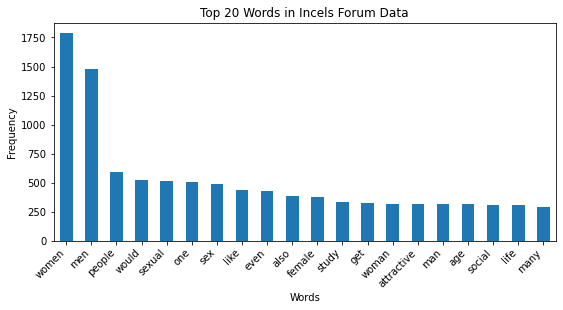

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Create a corpus of the text you want to search
corpus = incels_df["Cleaned_Post_Words"]

vectorizer = CountVectorizer()

# Transforming the corpus into a bag-of-words representation
X = vectorizer.fit_transform(corpus)

# Creating a DataFrame with word frequencies
word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Summing up the word frequencies
word_freq_sum = word_freq_df.sum()

# Sorting the words by frequency
sorted_word_freq = word_freq_sum.sort_values(ascending=False)

# Displaying the top N words and their frequencies
top_n_words = 20

# Plotting the top N words
plt.figure(figsize=(9, 4))
sorted_word_freq.head(top_n_words).plot(kind='bar')
plt.title('Top {} Words in Incels Forum Data'.format(top_n_words))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


The bar chart shows a clear skew in word frequency, with "female" and "male"
appearing almost three times as often as other words. In contrast, lower-ranked terms such as "many", "life", and "social" were less gender-centered and appeared less frequently. This distribution suggests a thematic concentration on gender-related topics, and the prominence of gender-specific terms implies that the discourse in the analyzed texts is focused or targeted.

#### INCELS.is tags

We want to see which tags are most popular:

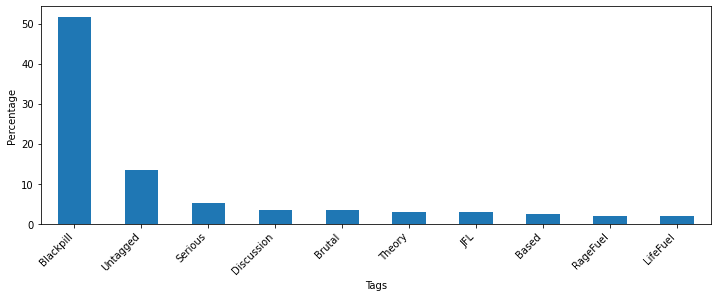

In [19]:
# Calculate tag counts
tag_counts = incels_df['Tags'].value_counts(normalize=True) * 100

# Selecting the top 10 tags
top_10_tags = tag_counts.head(10)

# Plotting the bar chart for the top 10 tags
plt.figure(figsize=(12, 4))
top_10_tags.plot(kind='bar')
plt.xlabel('Tags')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

While it is interesting to see that 'Blackpill' is by far the most popular tag, followed by 'Untagged'. It would also be interesting to see what happens with other tags. Therefore, in the next application of Count Vectorizer, we are going to see what are the five most popular words per Tag.

In [20]:
tags_series = incels_df['Tags'].str.split(',')

# Create a list of unique tags
unique_tags = list(set(tag for tags_list in tags_series.dropna() for tag in tags_list))

# Create a list to store dictionaries containing tag and its top 5 words
tag_word_list = []

# Loop through each unique tag and find the 5 most frequent words
for tag in unique_tags:
    # Filter DataFrame to include only rows with the current tag
    tag_rows = incels_df[incels_df['Tags'].apply(lambda tags: tag in tags if pd.notna(tags) else False)]

    # Combine tokenized posts for the tag into a single string
    tag_text = ' '.join(tag_rows['Cleaned_Post_Words'])

    # Use CountVectorizer to get word frequencies
    vectorizer = CountVectorizer()
    word_counts = vectorizer.fit_transform([tag_text])
    words = vectorizer.get_feature_names_out()
    frequencies = word_counts.toarray()[0]

    # Sort words based on frequencies
    sorted_words = [word for _, word in sorted(zip(frequencies, words), reverse=True)]

    # Store the tag and its top 5 words in the list
    tag_word_list.append({'Tag': tag, 'Top 5 Words': sorted_words[:5]})

# Create a DataFrame from the list
tag_word_df = pd.DataFrame(tag_word_list)

# Print or display the resulting DataFrame
tag_word_df


,Tag,Top 5 Words
0,Experiment,"[threads, avi, replies, foid, ryuko]"
1,Soy,"[incel, reality, claim, incelsis, arrested]"
2,SuicideFuel,"[never, say, one, nonexistence, message]"
3,Theory,"[women, men, one, soy, people]"
4,Untagged,"[women, men, one, sexual, even]"
5,JFL,"[autistic, women, females, men, sexual]"
6,Blackpill,"[women, men, people, age, attractive]"
7,Brutal,"[women, men, pain, receptors, sex]"
8,TeeHee,"[yahoo, long, lockdown, zoom, without]"
9,Story,"[tesla, people, would, edison, life]"


Predictably, the term "woman-related" emerged in 95 out of 12 instances.

#### NLTK

Let’s delve deeper into this data. First we use NLTK to see the context of feature words and perform sentiment analysis on post content.

NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum. (See the NLTK [documention](https://www.nltk.org/index.html))

Assuming you have read the 'Installing NLTK' part in the documentation and successfully downloaded it, please go further.

1. **Concordance**

Now we can search for some words that interest us and see their context by calling the Concordance function.
We call Concordance on 'Post_Content' instead of 'Cleaned_Post_Words' because in the latter we already removed stopwords, and that does not work well with Concordance.

In [21]:
import nltk
from nltk.text import Text


# Flatten the list of lists to perform the lower function
tokens = [word_tokenize(str(post).lower()) for post in incels_df['Post_Content']]
flat_tokens = [token for sublist in tokens for token in sublist]

# Create Text object for concordance
text = Text(flat_tokens)

# Find concordances for specific words
violence_concordance = text.concordance('violence', width=100, lines=10)
racism_concordance = text.concordance('racism', width=100, lines=10)
misogyny_concordance = text.concordance('misogyny', width=100, lines=10)

Displaying 10 of 61 matches:
re more likely be victims of intimate partner violence and unwanted sexual experiences the perpetrat
s not come from a logical place its a form of violence they are basically saying fuck you take it up
muhl mills 2021 source the sense in senseless violence male reproductive strategy and the modern sex
ons you can not win the constant male on male violence we observe on these forums is literally exact
vorgcontent101101171330v2 though the surge in violence affected all the races and both genders it wa
up by the mid1980s 72 per 100000 the flood of violence from the 1960s through the 1980s reshaped ame
 lustful as one engaged or witnessing acts of violence ” should be another one based on what i have 
an you doofus your only advantage as a man is violence but even then i am not so sure women don ’ t 
 feel alive at this point they resort extreme violence in the bedroom or outright disgusting acts li
ady knows is hybristophilia female attraction violence httpsen

2. **Sentiment Analysis**

NLTK already has a built-in, pretrained sentiment analyzer called VADER. Since VADER is pretrained, you can get results more quickly than with many other analyzers.

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis directly without a function
incels_df['Sentiment_Score'] = incels_df['Cleaned_Post_Words'].apply(lambda x: sia.polarity_scores(x)['compound'])
incels_df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\harmb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Title,Tags,Date,Views,Replies,Post_Content,Link,Cleaned_Post_Words,Sentiment_Score
0,Rules and FAQ,Untagged,"Nov 9, 2017",352000,14,welcome this is a forum for male involuntary ...,https://incels.is/threads/rules-and-faq.799/,welcome forum male involuntary celibates singl...,0.0915
1,Introduction to Incels,Untagged,"Jan 18, 2018",75000,0,introduction incels what does incel mean inc...,https://incels.is/threads/introduction-to-ince...,introduction incels incel mean incel means inv...,0.9945
2,ITS BEGUN! THE FUTURE IS POLYGAMY!!!,News,"Dec 14, 2020",42000,160,view httpsyoutuben2zk7ojtcjq even red pilled...,https://incels.is/threads/its-begun-the-future...,view httpsyoutuben2zk7ojtcjq even red pilled f...,0.3612
3,THIS is the root cause of inceldom (and it's I...,Blackpill,"Dec 10, 2022",11000,111,lets look at some of the symptoms of our incel...,https://incels.is/threads/this-is-the-root-cau...,lets look symptoms inceldom trace back root ca...,-0.6720
4,"r/IncelTears face reveal: meet AdvocateDoogy, ...",Soy,"Dec 9, 2021",57000,461,talk about foreshadowing doogycel meet adam p...,https://incels.is/threads/r-inceltears-face-re...,talk foreshadowing doogycel meet adam paul doo...,-0.5147


Now we get a new column '`Sentiment_Score`'. The score can range from -1 (most negative) to 1 (most positive), with 0 indicating a neutral sentiment. As evident from the chart, the majority of the statements exhibit a positive trend.

3. **Custom Keyword Search**

If you are interested in certain topics, you can create a list containing these words, search for these words, and conduct research on what interests you. Here, we have searched for the occurrence of a set of words in posts.

In [23]:
# Create a keywords list
keywords = ['violence', 'racism', 'misogyny', 'angry', 'hopeless', 'blackpill', 'redpill']

# Create an empty DataFrame to store the results
keyword_df = pd.DataFrame()

# Each column will contain True if the corresponding keyword is present in 'Tokenized_Post', False otherwise
for keyword in keywords:
    keyword_df[keyword] = incels_df['Cleaned_Post_Words'].str.contains(keyword, case=False)


In [24]:
keyword_columns = ['violence', 'racism', 'misogyny', 'angry', 'hopeless', 'blackpill', 'redpill']

# Count the occurrences of True for each keyword
keyword_counts = keyword_df[keyword_columns].sum()

# Create a new DataFrame from the counts
keyword_counts_df = pd.DataFrame({'Keyword': keyword_counts.index, 'Count': keyword_counts.values})

keyword_counts_df


,Keyword,Count
0,violence,17
1,racism,5
2,misogyny,6
3,angry,9
4,hopeless,3
5,blackpill,45
6,redpill,11


#### Seaborn

If you are interested in data visualization, Seaborn is an amazing visualization library for statistical graphics plotting in Python. Here is a [tutorial](https://seaborn.pydata.org/tutorial.html) for it.

We can have a look at the most popular post in our dataset and map the relationship between Views and Replies.

In [25]:
# Display topics with the highest number of views
top_views_topics = incels_df.sort_values(by='Views', ascending=False).head(10)
print("Top Topics by Views:")
top_views_topics[['Title', 'Views', 'Tags']]

Top Topics by Views:


,Title,Views,Tags
0,Rules and FAQ,352000,Untagged
88,This is what every foid thinks about ugly men,141000,It's Over
49,"Roundup of Thailand Trip - girls, advice, conv...",137000,LifeFuel
67,Holy shit chad posts 1 minute videa of his fac...,134000,JFL
34,"Gentlemen, give it up for @itsOVER",133000,LifeFuel
50,[Tinder Experiment] Ugly gymcel gets hot Tinde...,108000,Untagged
65,[Tinder Experiment] 5'7 incel gets more than 4...,107000,Untagged
32,Women gain sexual pleasure from the pain that ...,107000,Brutal
77,The Life and Times of itsOVER (Legendary white...,102000,Untagged
23,Females are Psychopaths – A Socio-Historic Review,96000,Blackpill


In [26]:
# Display topics with the highest number of replies
top_replies_topics = incels_df.sort_values(by='Replies', ascending=False).head(10)
print("\nTop Topics by Replies:")
top_replies_topics[['Title', 'Replies', 'Tags']]


Top Topics by Replies:


,Title,Replies,Tags
34,"Gentlemen, give it up for @itsOVER",616,LifeFuel
67,Holy shit chad posts 1 minute videa of his fac...,610,JFL
50,[Tinder Experiment] Ugly gymcel gets hot Tinde...,485,Untagged
4,"r/IncelTears face reveal: meet AdvocateDoogy, ...",461,Soy
77,The Life and Times of itsOVER (Legendary white...,451,Untagged
49,"Roundup of Thailand Trip - girls, advice, conv...",440,LifeFuel
7,Balding is so terrifying that almost every fam...,410,Blackpill
65,[Tinder Experiment] 5'7 incel gets more than 4...,372,Untagged
79,Inceldom Is Actually A Blessing In Disguise (I...,363,Blackpill
21,Almost 200 Pornstars Say Size Matters (Brutal ...,343,Brutal


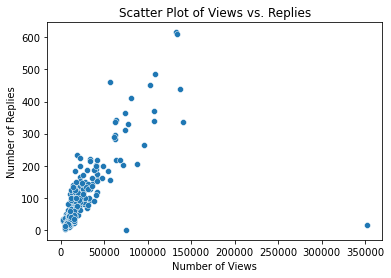

In [27]:
import seaborn as sns

# Assuming 'views' and 'replies' are the columns representing the number of views and replies in your DataFrame
sns.scatterplot(x='Views', y='Replies', data=incels_df)
plt.title('Scatter Plot of Views vs. Replies')
plt.xlabel('Number of Views')
plt.ylabel('Number of Replies')
plt.show()

This scatterplot shows that viewing posts is significantly better than engaging in comments. Notably, most of the data points are clustered in the lower left corner, indicating low engagement. While the posts had the highest number of views at 50,000, the responses were surprisingly low, with a maximum of 600 responses. These data suggest a trend of posts accumulating views without generating substantial commenting activity.

The overall pattern observed in the scatterplot y = 200x positive proportional function is essentially the same, emphasizing the general phenomenon of higher post views than comment engagement.



## 5. Active Learning Exercises

As mentioned before, in this DIY section, we will focus on two further analysis: *visualization of word frequency analysis* and an *in-depth exploration of sentiment analysis*. Through these exercises, our aim is to guide you to explore the nuances in the posts.

1. **Visualization of Word Frequency Analysis**

In this section, the words that appear the most frequently in forum posts are represented visually. We hope to highlight the important terms and recurring themes in the chats by using word clouds.

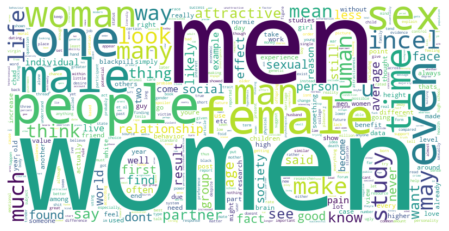

In [28]:
from wordcloud import WordCloud

# Tokenize each row in the 'Cleaned_Post_Words' column of the incels_df DataFrame, and join the resulting tokens into a single space-separated string.
all_text = ' '.join([' '.join(word_tokenize(row)) for row in incels_df['Cleaned_Post_Words']])

# Create a WordCloud
wordcloud = WordCloud(background_color="white", width=800, height=400, max_words=1000).generate(all_text)

# Display the WordCloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In this context, prominent terms include "women," "men," "people," "female," and "one," reflecting recurrent references and discussions.

In Python, in addition to word clouds and bar charts, there are various methods that can be used for visualizing word frequency data, such as tree and bubble charts. Now, It's your time to create interesting data visualisations!

In [29]:
# Your code

2. **Advanced Sentiment Analysis**

After conducting sentiment analysis on forum posts and quantifying the emotional tendencies of each post, we can further explore the relationship between sentiment scores and other features like post lengths.

In [30]:
# Calculate the length of each post in words, for this we pick the column 'Post_Content' because it still has the stopwords
incels_df['Post_Length'] = incels_df['Post_Content'].apply(lambda x: len(x.split()))

Correlation between Post Length and Sentiment Score: 0.036188844715456525


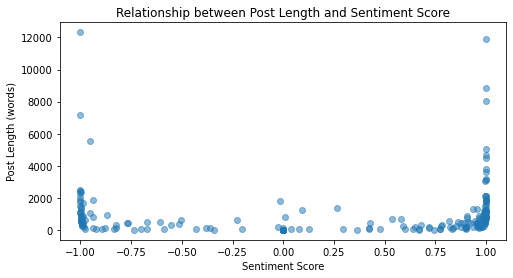

In [31]:
# Calculate the correlation between post length and sentiment score
correlation = incels_df['Sentiment_Score'].corr(incels_df['Post_Length'])
print("Correlation between Post Length and Sentiment Score:", correlation)

# Visualize the relationship between the two variables with a scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(incels_df['Sentiment_Score'], incels_df['Post_Length'], alpha=0.5)
plt.title('Relationship between Post Length and Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Post Length (words)')
plt.show()

The graph shows dots concentrated in the left and lower right corners, indicating a polarization of posts. Notably, the threshold sentiment scores for positive and negative are consistent with an increase in engagement (words length of the post). Second, we also found that posts categorized as neutral were also skewed toward higher word length. Overall, there is a clear trend that positive statements tend to use more words.

Through the analysis of the collective emotional tone of posts over periods of days, months, or even years, we can learn about how the dynamics of the forum's community are changing over time.

In [32]:
# Convert the 'Date' column to a datetime object
incels_df['Date'] = pd.to_datetime(incels_df['Date'])

# Set the 'Date' column as the DataFrame's index
incels_df.set_index('Date', inplace=True)

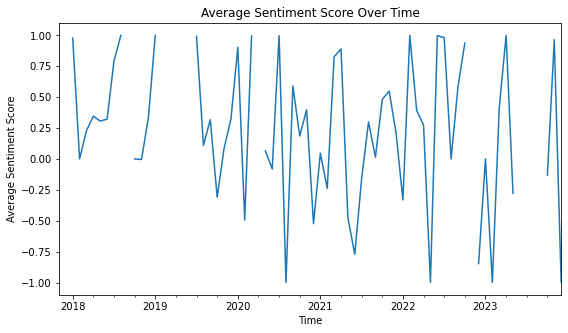

In [33]:
# Calculate the average sentiment score for each month/year
# Choose 'M' or 'Y' to aggregate by month or year
average_sentiment_over_time = incels_df['Sentiment_Score'].resample('M').mean()

# Plot a time series chart to show how sentiment scores change over time
plt.figure(figsize=(9, 5))
average_sentiment_over_time.plot()
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Time')
plt.ylabel('Average Sentiment Score')
plt.show()

In [34]:
incels_df.reset_index(inplace=True)

The line chart illustrates that during the period from 2018 to 2019, the average sentiment scores were predominantly concentrated within the range of 0-1. This indicates a prevailing positive tone in the discussions. However, a notable shift occurred in the sentiment trend during 2019-2020, marked by a deviation towards negative values, departing from the neutral score of 0. Subsequently, from 2021 to 2023, there was a distinct diversification in the sensitivity of expressions.

In summary, the analysis reveals significant changes in emotions over these years. While the early tones were generally positive, a shift towards negativity was observed in 2019-2020, followed by increasing variability in emotional expressions in the subsequent years. This temporal evolution highlights the dynamic nature of emotions conveyed in the discourse and underscores the need for further research into the contextual factors, such as changes in membership and composition, that may influence these fluctuations.

Futhermore,  you can explore the relationship between sentiment scores and other features such as views and replies. For instance, what is the correlation between the number of views and replies received for theme posts and their sesentiment scores? Now, have a try!

In [35]:
# Your code

3. **Critical thinking about data**

As you have seen, we have worked with offensive and personal data. As a final critical thinking question, how would you have handled this situation and this data? Would you have done the same, or do you have other ideas on how to approach this?

Your Answer Here


Congratulations on completing all the exercises! You're so great! 😄

### References:
Taylor, J. (2018, August 29). The woman who founded the “incel” movement. BBC News. https://www.bbc.com/news/world-us-canada-45284455

Publications Office of the European Union. (2021, October 18). Incels: A first scan of the phenomenon (in the EU) and its relevance and challenges for P/CVE, October 2021. Migration and Home Affairs. https://home-affairs.ec.europa.eu/whats-new/publications/incels-first-scan-phenomenon-eu-and-its-relevance-and-challenges-pcve-october-2021_en#details

# At the end of the notebook, we get rid of the Post_Content and the Cleaned_Post_Words rows, as to delete personal content from our CSV dataset.
### The research is still replicable, and the posts can still be found clicking the links in the CSV

In [36]:
incels_df.head()

,Date,Title,Tags,Views,Replies,Post_Content,Link,Cleaned_Post_Words,Sentiment_Score,Post_Length
0,2017-11-09,Rules and FAQ,Untagged,352000,14,welcome this is a forum for male involuntary ...,https://incels.is/threads/rules-and-faq.799/,welcome forum male involuntary celibates singl...,0.0915,1214
1,2018-01-18,Introduction to Incels,Untagged,75000,0,introduction incels what does incel mean inc...,https://incels.is/threads/introduction-to-ince...,introduction incels incel mean incel means inv...,0.9945,1262
2,2020-12-14,ITS BEGUN! THE FUTURE IS POLYGAMY!!!,News,42000,160,view httpsyoutuben2zk7ojtcjq even red pilled...,https://incels.is/threads/its-begun-the-future...,view httpsyoutuben2zk7ojtcjq even red pilled f...,0.3612,11
3,2022-12-10,THIS is the root cause of inceldom (and it's I...,Blackpill,11000,111,lets look at some of the symptoms of our incel...,https://incels.is/threads/this-is-the-root-cau...,lets look symptoms inceldom trace back root ca...,-0.6720,492
4,2021-12-09,"r/IncelTears face reveal: meet AdvocateDoogy, ...",Soy,57000,461,talk about foreshadowing doogycel meet adam p...,https://incels.is/threads/r-inceltears-face-re...,talk foreshadowing doogycel meet adam paul doo...,-0.5147,355


In [37]:
# Specify the columns to remove
columns_to_remove = ['Post_Content', 'Cleaned_Post_Words']

# Use the drop method to remove the specified columns
incels_df = incels_df.drop(columns=columns_to_remove)

# Save the DataFrame to a CSV file
incels_df.to_csv('incels_forum_data.csv', index=False)

In [38]:
incels_df.head()

,Date,Title,Tags,Views,Replies,Link,Sentiment_Score,Post_Length
0,2017-11-09,Rules and FAQ,Untagged,352000,14,https://incels.is/threads/rules-and-faq.799/,0.0915,1214
1,2018-01-18,Introduction to Incels,Untagged,75000,0,https://incels.is/threads/introduction-to-ince...,0.9945,1262
2,2020-12-14,ITS BEGUN! THE FUTURE IS POLYGAMY!!!,News,42000,160,https://incels.is/threads/its-begun-the-future...,0.3612,11
3,2022-12-10,THIS is the root cause of inceldom (and it's I...,Blackpill,11000,111,https://incels.is/threads/this-is-the-root-cau...,-0.6720,492
4,2021-12-09,"r/IncelTears face reveal: meet AdvocateDoogy, ...",Soy,57000,461,https://incels.is/threads/r-inceltears-face-re...,-0.5147,355
